In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from analyze.get_score_df import get_each_epoch_result_df
from analyze.get_structure_master import get_structure_master_df
sns.set(font_scale = 1.3)

path2target ='/Users/y1u0d2/desktop/Lab/result/n2p2/Si/89/02'
# path2target = '/Users/y1u0d2/desktop/Lab/result/n2p2/Si/16/three/rc_4-np_7'
epoch = 40

In [2]:
f_test_df, f_train_df, e_test_df, e_train_df = get_each_epoch_result_df(path2target, epoch=epoch)

In [3]:
structure_master_df = get_structure_master_df(path2target)

f_test_df = pd.merge(f_test_df, structure_master_df, how='inner',left_on='index_s' ,right_on='index')
f_train_df = pd.merge(f_train_df, structure_master_df, how='inner', left_on='index_s' ,right_on='index')
e_test_df = pd.merge(e_test_df, structure_master_df, how='inner', on='index')
e_train_df = pd.merge(e_train_df, structure_master_df, how='inner', on='index')

In [4]:
def plot_y_x(min, max, ax):
    """
    plot y=x
    """
    x = np.linspace(min*0.9, max*1.1, 100)
    y = x
    ax.plot(x, y, color='red', alpha=0.5)
    # sns.lineplot(x=x, y=y, ax=ax, palette='deep')

def plot_force_obs_pred(df, ax, title):
    """_summary_

    Args:
        df (_type_): _description_
        ax (_type_, optional): _description_. Defaults to ax.
    """
    max_lim = max(df['Fref_original'].max(), df['Fnnp_original'].max())
    min_lim = min(df['Fref_original'].min(), df['Fnnp_original'].min())
    lim = (min_lim*0.9, max_lim*1.1)
    ax.set(xlim=lim, ylim=lim)
    ax.set_title(title)
    sns.scatterplot(data=df, x='Fref_original', y='Fnnp_original', ax=ax, hue='mpid')
    plot_y_x(min_lim, max_lim, ax)
    
def plot_energy_obs_pred(df, ax, title):
    # max_lim = max(df['Eref_original'].max(), df['Ennp_original'].max())
    # min_lim = min(df['Eref_original'].min(), df['Ennp_original'].min())
    max_lim = max(df['Eref'].max(), df['Ennp'].max())
    min_lim = min(df['Eref'].min(), df['Ennp'].min())
    print(min_lim, max_lim)
    lim = (min_lim*0.9, max_lim*1.1)
    ax.set(xlim=lim, ylim=lim)
    ax.set_title(title)
    sns.scatterplot(data=df, x='Eref', y='Ennp', ax=ax, hue='mpid')
    plot_y_x(min_lim, max_lim, ax)

-1.78471695 9.92678813


/var/folders/hl/8xx4rtm50t7czkr79gggbqqr0000gr/T/ipykernel_27374/1949119647.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/hl/8xx4rtm50t7czkr79gggbqqr0000gr/T/ipykernel_27374/1949119647.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


-1.78357132 10.9621158


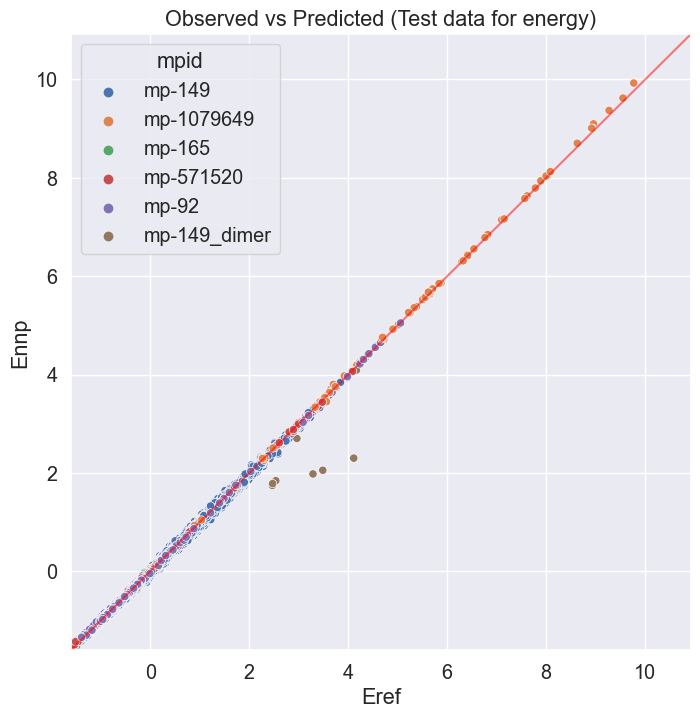

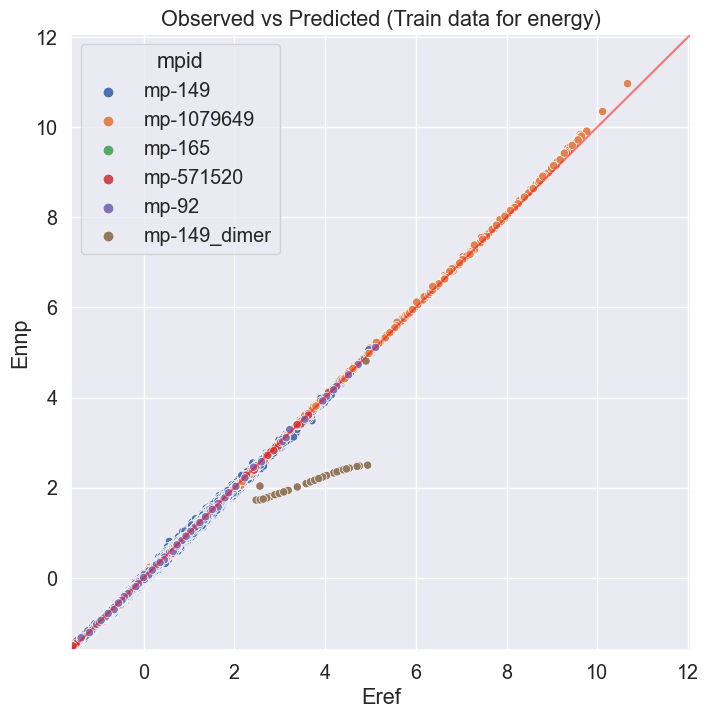

In [5]:
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot(111)

plot_energy_obs_pred(e_test_df, ax=ax, title='Observed vs Predicted (Test data for energy)')
fig.show()

fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot(111)
plot_energy_obs_pred(e_train_df, ax=ax, title='Observed vs Predicted (Train data for energy)')
fig.show()

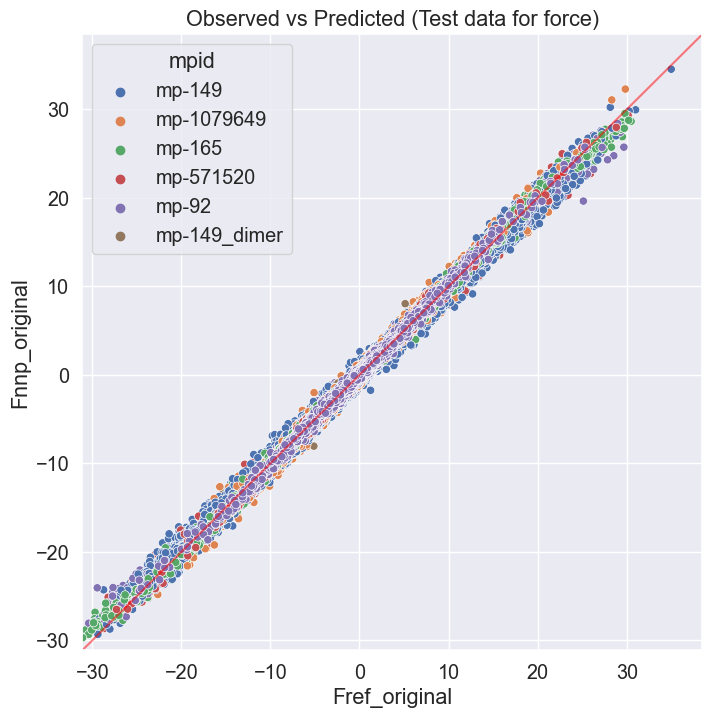

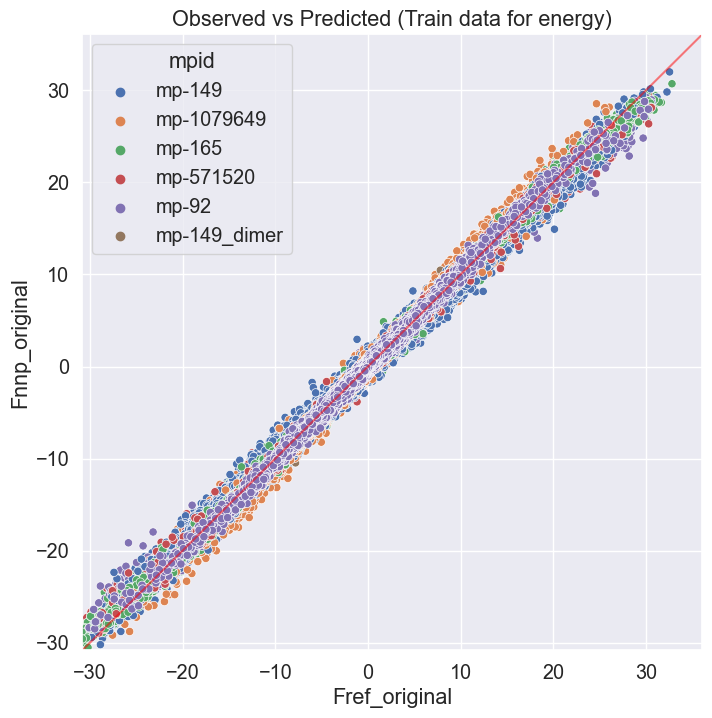

In [6]:
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
fig.set_facecolor('white')
ax = fig.add_subplot(111)

plot_force_obs_pred(f_test_df, ax=ax, title='Observed vs Predicted (Test data for force)')

fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot(111)
plot_force_obs_pred(f_train_df, ax=ax, title='Observed vs Predicted (Train data for energy)')